In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Here reference level $C_{0}^{\alpha}L_{0}^{1-\alpha}$ refers to a steady state variable.

The utility is given by:
\begin{equation}
    u(C_{t},L_{t}) = \begin{cases}
    \frac{(C_{t}^{\alpha}L_{t}^{1-\alpha})^{1-\rho}}{1-\rho} \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha} \geq C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \frac{(C_{0}^{\alpha}L_{0}^{1-\alpha})^{1-\rho}}{1-\rho} - \lambda(\frac{(C_{0}^{\alpha}L_{0}^{1-\alpha})^{1-\rho}}{1-\rho} - \frac{(C_{t}^{\alpha}L_{t}^{1-\alpha})^{1-\rho}}{1-\rho}) \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha}< C_{0}^{\alpha}L_{0}^{1-\alpha} \\
\end{cases}
\end{equation}



If we reframe this a bit to make sure all the object value is positive:
\begin{equation}
    u(C_{t},L_{t}) = \begin{cases}
    \frac{(C_{t}^{\alpha}L_{t}^{1-\alpha})^{1-\rho}}{1-\rho} + (\lambda-1) \frac{(C_{0}^{\alpha}L_{0}^{1-\alpha})^{1-\rho}}{1-\rho}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha} \geq C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \lambda \frac{(C_{t}^{\alpha}L_{t}^{1-\alpha})^{1-\rho}}{1-\rho}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha}< C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \end{cases}
\end{equation}

The partial derivative with respect to $C_{t}$ is:
\begin{equation}
    \frac{\partial u(C_{t},L_{t})}{\partial C_{t}} = \begin{cases}
    \alpha C_{t}^{\alpha(1-\rho)-1} L_{t}^{(1-\alpha)(1-\rho)}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha} \geq C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \lambda \alpha C_{t}^{\alpha(1-\rho)-1} L_{t}^{(1-\alpha)(1-\rho)}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha}< C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \end{cases}
\end{equation}

The partial derivative with respect to $L_{t}$ is:
\begin{equation}
    \frac{\partial u(C_{t},L_{t})}{\partial L_{t}} = \begin{cases}
    (1-\alpha) C_{t}^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha} \geq C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \lambda (1-\alpha) C_{t}^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha}< C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \end{cases}
\end{equation}

In [2]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

In [3]:
#import package
import numpy as np
from datascience import Table
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy import interpolate
from scipy import optimize
import time

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# import data
import pandas as pd
interestTable = pd.read_csv('return_H.csv', usecols=[1,2,3])  ## Import interest rate
mortalityTable = pd.read_csv('newmort2.csv', usecols=[1,2,3])  ## Import mortality table'
Expectation = Table.from_df(interestTable)  ## Convert readin csv file to 'table'

In [4]:
# parameter setting
ρ = 5 # 5?
α = 0.9
β = 1
λ = 3

# C0 = 5.5 # 50?
# L0 = 3/7
# Rx = np.power(C0,α)*np.power(L0,1-α)

Y1 = 11.9
Y2 = 3.0 # salary
# interest = 0.05
θ = 0.5

In [5]:
Upper_grid = 200 #in ($0,000) dollars
Lower_grid = 1
grids = 200
A74 = np.linspace(Lower_grid, Upper_grid, grids)

Upper_grid_ref = 59 #in ($0,000) dollars
Lower_grid_ref = 1
Refc_grids = 30
CL_ref75 = np.linspace(Lower_grid_ref, Upper_grid_ref, Refc_grids)

print('α, ρ, λ, Y1, Y2 = ', α, ρ, λ, Y1, Y2)
print('# of balance grids='+str(grids))
print('# of reference grids='+str(Refc_grids))

α, ρ, λ, Y1, Y2 =  0.9 5 3 11.9 3.0
# of balance grids=200
# of reference grids=30


# ===========================EGM ===========================

In [6]:
def utility_1(c, l, Rx):
    '''
    Define the penalty utility function of consumption (c) and leisure (l), return the value of utility
    '''
    utility = np.copy(c)
    criteria = np.power(c,α)*np.power(l,1-α) >= Rx
    
    utility[c<0] = -λ * np.power(np.power(-c[c<0],α) * np.power(l[c<0],1-α),1-ρ) / (1-ρ)
    utility[(c>0) & (criteria==True)] = np.power(np.power(c[(c>0)&(criteria==True)],α) * np.power(l[(c>0)&(criteria==True)],1-α), 1-ρ)/(1-ρ) + \
                    (λ-1)*np.power(Rx,1-ρ)/(1-ρ)
    utility[(c>0) & (criteria==False)] = λ * np.power(np.power(c[(c>0)&(criteria==False)],α) * np.power(l[(c>0)&(criteria==False)],1-α),1-ρ) / (1-ρ)
#     print(utility[c<0])
    return utility

In [7]:
def utility_1_diff_c(c, l, Rx):
    '''
    Return the partial derivative of u(c,l) with respect to c
    '''
    utility_diff = np.copy(c)
    criteria = np.power(c,α)*np.power(l,1-α) >= Rx
#     utility_diff[c<0] = -λ * α * np.power(-c[c<0],α*(1-ρ)-1) * np.power(l[c<0], (1-α)*(1-ρ))
    utility_diff[(c>0) & (criteria==True)] = α * np.power(c[(c>0) & (criteria==True)],α*(1-ρ)-1) \
                                            * np.power(l[(c>0) & (criteria==True)], (1-α)*(1-ρ))
    utility_diff[(c>0) & (criteria==False)] = λ * α * np.power(c[(c>0) & (criteria==False)],α*(1-ρ)-1)\
                                            * np.power(l[(c>0) & (criteria==False)], (1-α)*(1-ρ))
    return utility_diff

In [8]:
def utility_1_diff_l(c, l, Rx):
    '''
    Return the partial derivative of u(c,l) with respect to l
    '''
    utility_diff = np.copy(c)
    criteria = np.power(c,α)*np.power(l,1-α) >= Rx
#     utility_diff[c<0] = -λ * α * np.power(-c[c<0],α*(1-ρ)-1) * np.power(l[c<0], (1-α)*(1-ρ))
    utility_diff[(c>0) & (criteria==True)] = (1-α) * np.power(c[(c>0) & (criteria==True)],α*(1-ρ)) \
                                            * np.power(l[(c>0) & (criteria==True)], (1-α)*(1-ρ)-1)
    utility_diff[(c>0) & (criteria==False)] = λ * (1-α) * np.power(c[(c>0) & (criteria==False)],α*(1-ρ))\
                                            * np.power(l[(c>0) & (criteria==False)], (1-α)*(1-ρ)-1)
    return utility_diff

\begin{equation} \label{eq14}
\begin{split}
    u'_{L}(C_{t},L_{t}) \frac{1}{Y_{t}} &= \beta(1-q_{t})E_{t}[u'_{C}(C_{t+1},L_{t+1}) (1 + \underline{\theta} i + (1 - \underline{\theta}) r)|A_{t}] \\
    LHS &= RHS
\end{split}
\end{equation}

where
\begin{equation*}
    u'_{C}(C_{t+1},L_{t+1}) = \begin{cases}
    \alpha C_{t+1}^{\alpha(1-\rho)-1} L_{t+1}^{(1-\alpha)(1-\rho)}
    \quad \text{if } C_{t+1}^{\alpha}L_{t+1}^{1-\alpha} > C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \lambda \alpha C_{t+1}^{\alpha(1-\rho)-1} L_{t+1}^{(1-\alpha)(1-\rho)}
    \quad \text{if } C_{t+1}^{\alpha}L_{t+1}^{1-\alpha}< C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \end{cases}
\end{equation*}

If criteria ($C_{t}^{\alpha}L_{t}^{1-\alpha} > C_{0}^{\alpha}L_{0}^{1-\alpha}$) is True
        \begin{equation}
        \begin{split}
            LHS &= (1-\alpha) C_{t}^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1} / Y_{t} \\
            &= (1-\alpha) (\frac{\alpha Y_{t}}{1-\alpha} L_{t})^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1} / Y_{t} \\
            &= \alpha  (\frac{\alpha Y_{t}}{1-\alpha})^{\alpha(1-\rho)-1} L_{t}^{-\rho}
        \end{split}
        \end{equation}
    therefore, the optimal leisure is calculated by:
        \begin{equation} \label{eq16}
            L_{t}^{*}=[\frac{RHS}{\alpha (\frac{\alpha Y_{t}}{1-\alpha})^{\alpha(1-\rho)-1}}]^{-\frac{1}{\rho}}
        \end{equation}
        
If criteria ($C_{t}^{\alpha}L_{t}^{1-\alpha} < C_{0}^{\alpha}L_{0}^{1-\alpha}$) is True
        \begin{equation}
        \begin{split}
            LHS &= \lambda (1-\alpha) C_{t}^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1} / Y_{t} \\
            &= \lambda (1-\alpha) (\frac{\alpha Y_{t}}{1-\alpha} L_{t})^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1} / Y_{t} \\
            &= \lambda \alpha (\frac{\alpha Y_{t}}{1-\alpha})^{\alpha(1-\rho)-1} L_{t}^{-\rho}
        \end{split}
        \end{equation}
    therefore, the optimal leisure is calculated by:
        \begin{equation} \label{eq19}
            L_{t}^{*}=[\frac{RHS}{\lambda \alpha (\frac{\alpha Y_{t}}{1-\alpha})^{ \alpha(1-\rho)-1}}]^{-\frac{1}{\rho}}
        \end{equation}

In [9]:
def utility_1_diff_inv_l(RHS, Y2):
    '''
    When there are no constraints on either c or l, if the composite of c&l is above the reference level,
    return the optimal leisure given the above formula.
    '''
    LHS = α*np.power(α*Y2/(1-α), α*(1-ρ)-1)
    leisure = np.power(RHS/LHS, -1/ρ)
    return leisure

def utility_1_diff_inv_l2(RHS, Y2):
    '''
    When there are no constraints on either c or l, if the composite of c&l is below the reference level,
    return the optimal leisure given the above formula.
    '''
    LHS = α*np.power(α*Y2/(1-α), α*(1-ρ)-1)
    leisure = np.power(RHS/LHS/λ, -1/ρ)
    return leisure

In [10]:
# def utility_inv_lei(RHS, Y1=Y1):
#     x = (1-α)* np.power(Y1, α*(1-ρ)-1) #C=Y2
#     y = np.power(RHS / x, 1/((1-α)*(1-ρ)-1))
#     return y

# def utility_inv_lei2(RHS, Y1=Y1):
#     x = (1-α)* np.power(Y1, α*(1-ρ)-1) #C=Y2
#     y = np.power(RHS / (x*λ), 1/((1-α)*(1-ρ)-1))
#     return y

In [11]:
def utility_1_diff_inv_c(leisure, RHS):
    '''
    Given optimal leisure is found, if the composite of c&l is above the reference level, 
    return the value of optimal consumption
    '''
    x = np.power(leisure, (1-α)*(1-ρ))
    y = np.power(RHS / (x*α), 1/(α*(1-ρ)-1))
    return y

def utility_1_diff_inv_c2(leisure, RHS):
    '''
    Given optimal leisure is found, if the composite of c&l is below the reference level, 
    return the value of optimal consumption
    '''
    x = np.power(leisure, (1-α)*(1-ρ))
    y = np.power(RHS / (x*α*λ), 1/(α*(1-ρ)-1))
    return y

In [12]:
def constraint_l(leisure):
    if leisure < 2/7:
        leisure = 2/7
    elif leisure > 1:
        leisure = 1
    return leisure

def criteria(c, l, Rx):
    return np.power(c,α)*np.power(l,1-α) > Rx

def criteria2(c, l, Rx):
    return np.power(c,α)*np.power(l,1-α) < Rx

In [13]:
def Optimal_74(A74, Rx, income=Y2):
    inv_return = 1 + (1-θ)*Expectation.column('Bond') + θ*Expectation.column('Eq') # (1+i)
    C75 = A74*inv_return # a vector
    L75 = np.ones(len(C75))
    RHS = β*(1-mortalityTable['X'][73]) * (utility_1_diff_c(C75,L75,Rx)*inv_return*Expectation.column('Probability')).sum()
    lei1 = utility_1_diff_inv_l(RHS,income) ## Unconstraint leisure
#     print(leisure5)
    lei1 = constraint_l(lei1)
    lei2 = utility_1_diff_inv_l2(RHS,income)
    lei2 = constraint_l(lei2)
    con1 = utility_1_diff_inv_c(lei1, RHS)
    con2 = utility_1_diff_inv_c2(lei2, RHS)
    if criteria(con1,lei1,Rx)==True:
        consumption = con1
        leisure = lei1
    else:
        if criteria2(con2,lei2,Rx)==True:
            consumption = con2
            leisure = lei2
        else:
            leisure = Rx / np.power(α*Y2/(1-α), α)
            leisure = constraint_l(leisure)
            consumption = np.power(Rx/np.power(leisure,1-α), 1/α)
    return consumption, leisure

In [14]:
aa, bb = np.meshgrid(A74, CL_ref75)
print(np.shape(aa))

(30, 200)


In [15]:
C74 = np.zeros((len(CL_ref75),len(A74)))
L74 = np.zeros((len(CL_ref75),len(A74)))
M74 = np.zeros((len(CL_ref75),len(A74)))
for j, C0 in enumerate(CL_ref75):# to increase a loop here we can use interp1d instead of 2d that may cause trouble
    for k, node in enumerate(A74):
        C74[j][k], L74[j][k]= Optimal_74(A74=node, Rx=C0)
        M74[j][k] = node - Y2*(1-L74[j][k]) + C74[j][k]

Optimal_results_EGM = {}
Optimal_results_EGM['A74'] = aa
Optimal_results_EGM['R74'] = bb
Optimal_results_EGM['C74'] = C74
Optimal_results_EGM['L74'] = L74
Optimal_results_EGM['M74'] = M74

In [16]:
def solve_73_65(A, age, income, table, Rx, Rx_col, raa=θ): # function on scatter node of post-decision balance At
    '''
    solve for optimal consumption and leisure for age 73-65
    only constraints on leisure, no constraints on consumption
    '''
    default_l = Rx / np.power(α*income/(1-α), α)
    default_l = constraint_l(default_l)
    default_c = np.power(Rx/np.power(default_l,1-α), 1/α)
    interest = 1 + raa*Expectation.column('Eq') + (1-raa)*Expectation.column('Bond') ##two global vectors
    Interpolation_C = interp1d(table['M%1d'%(age+1)][Rx_col], table['C%1d'%(age+1)][Rx_col], \
                               kind='linear', fill_value='extrapolate')
    Interpolation_L = interp1d(table['M%1d'%(age+1)][Rx_col], table['L%1d'%(age+1)][Rx_col], \
                               kind='linear', fill_value='extrapolate')
    C_next = Interpolation_C(A * interest) # this is a vector
    L_next = Interpolation_L(A * interest)
    
    numerator_L = β*(1-mortalityTable['X'][age-1]) * (utility_1_diff_c(C_next, L_next, Rx) \
                    * interest * Expectation.column('Probability')).sum()
    denominator_L = α * np.power((α*income)/(1-α), α*(1-ρ)-1)
    
    lei1 = utility_1_diff_inv_l(numerator_L, Y2)
    lei1 = constraint_l(lei1)
    lei2 = utility_1_diff_inv_l2(numerator_L, Y2)
    lei2 = constraint_l(lei2)
    con1 = utility_1_diff_inv_c(lei1, numerator_L)
    con2 = utility_1_diff_inv_c2(lei2, numerator_L)
    
    if criteria(con1,lei1, Rx)==True:
        return con1, lei1
    else:
        if criteria2(con2,lei2, Rx)==True:
            return con2,lei2
        else:
            return default_c, default_l

# For n-dimension of reference - Rx

In [17]:
start_time = time.time()
aa, bb = np.meshgrid(A74, CL_ref75)
Optimal_results_EGM = {'A74':aa,
                       'C74':C74,
                       'R74':bb,
                       'L74':L74,
                      'M74':M74}

for i in range(9): ## age 73-65 --> i from 0 to 9 (include)
    Cx = np.zeros((len(CL_ref75),len(A74)))
    Lx = np.zeros((len(CL_ref75),len(A74)))
    Mx = np.zeros((len(CL_ref75),len(A74)))
    for j, C0 in enumerate(CL_ref75):# to increase a loop here we can use interp1d instead of 2d that may cause trouble
        for k, node in enumerate(A74):
            Cx[j][k], Lx[j][k]= solve_73_65(A=node, age=73-i, income=Y2, table=Optimal_results_EGM, Rx=C0, Rx_col=j)
            Mx[j][k] = node - Y2*(1-Lx[j][k]) + Cx[j][k]
    Optimal_results_EGM['A%1d'%(73-i)] = aa
    Optimal_results_EGM['R%1d'%(73-i)] = bb
    Optimal_results_EGM['C%1d'%(73-i)] = Cx
    Optimal_results_EGM['L%1d'%(73-i)] = Lx
    Optimal_results_EGM['M%1d'%(73-i)] = Mx
    print('age%1d_finished!'%(73-i))
print("--- %s seconds ---" % (time.time() - start_time))

age73_finished!
age72_finished!
age71_finished!
age70_finished!
age69_finished!
age68_finished!
age67_finished!
age66_finished!
age65_finished!
--- 15.331465482711792 seconds ---


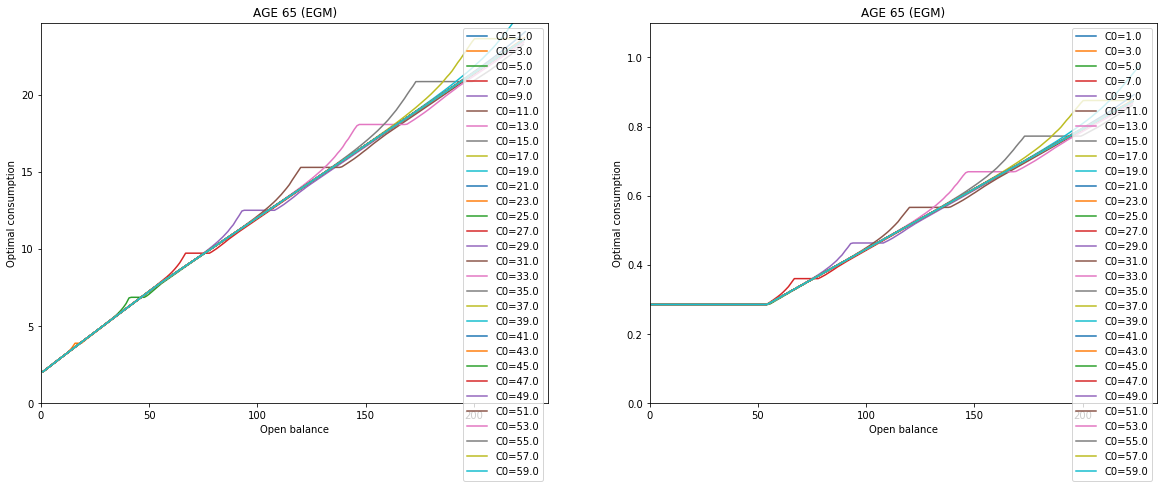

In [18]:
# SELECT YOUR AGE HERE TO PLOT OPTIMAL CONSUMPTION AND LEISURE (65-74)
AGE = 65

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
for i in range(Refc_grids):
    REF = Lower_grid_ref+(Upper_grid_ref-Lower_grid_ref)/(Refc_grids-1)*i
    plt.plot(Optimal_results_EGM['M%1d'%(AGE)][i], Optimal_results_EGM['C%1d'%(AGE)][i], label='C0=%1.1f'%(REF))
    plt.legend(loc='upper right')
    plt.xlabel('Open balance')
    plt.ylabel('Optimal consumption')
    plt.title('AGE %1d (EGM)'%(AGE))
    plt.xlim(0, )
    plt.ylim(0, )
    
plt.subplot(1,2,2)
for i in range(Refc_grids):
    REF = Lower_grid_ref+(Upper_grid_ref-Lower_grid_ref)/(Refc_grids-1)*i
    plt.plot(Optimal_results_EGM['M%1d'%(AGE)][i], Optimal_results_EGM['L%1d'%(AGE)][i], label='C0=%1.1f'%(REF))
    plt.legend(loc='upper right')
    plt.xlabel('Open balance')
    plt.ylabel('Optimal consumption')
    plt.title('AGE %1d (EGM)'%(AGE))
    plt.xlim(0, )
    plt.ylim(0, 1.1)

# Age 64

In [19]:
def solve_64(A, age, income, table, Rx, Rx_col, raa=θ):
    '''
    solve for optimal consumption and leisure for age 64
    occasionally constraints on both leisure and consumption
    '''
    interest = 1 + raa*Expectation.column('Eq') + (1-raa)*Expectation.column('Bond') ##two global vectors
    Interpolation_C = interp1d(table['M%1d'%(age+1)][Rx_col], table['C%1d'%(age+1)][Rx_col], \
                               kind='linear', fill_value='extrapolate')
    Interpolation_L = interp1d(table['M%1d'%(age+1)][Rx_col], table['L%1d'%(age+1)][Rx_col], \
                               kind='linear', fill_value='extrapolate')
    C_next = Interpolation_C(A * interest) # this is a vector
    L_next = Interpolation_L(A * interest)
    numerator_L = β*(1-mortalityTable['X'][age-1]) * (utility_1_diff_c(C_next, L_next, Rx) \
                                                     * interest*Expectation.column('Probability')).sum()
    
    lei1 = utility_1_diff_inv_l(RHS=numerator_L, Y2=Y1) # Now the income changes to Y1
    lei2 = constraint_l(lei1) #constrainted leisure
    con1 = utility_1_diff_inv_c(lei2, numerator_L) # use constrainted l to find unconstrained c
#     lei1 = con1 * (1-α) / (α*income) # if leisure is constrained, then the above unconstrained leisure is not true,
#     # should be recalculated like this. 
#     lei2 = constraint_l(lei1)
    con2 = con1
    if con2 >= income*(1-lei2): #if consumption is constraint
        lei1 = 1-α
        lei2 = constraint_l(lei1)
        con2 = income*(1-lei2)
        
    lei3 = utility_1_diff_inv_l2(RHS=numerator_L, Y2=Y1)
    lei4 = constraint_l(lei3)
    con3 = utility_1_diff_inv_c2(lei4, numerator_L)
    con4 = con3
    if con4 >= income*(1-lei4):
        lei3 = 1-α
        lei4 = constraint_l(lei3)
        con4 = income*(1-lei4)
    
    default_l_uncon = Rx / np.power(α*income/(1-α), α)
    default_l = constraint_l(default_l_uncon)
    default_c_uncon = np.power(Rx / np.power(default_l, 1-α), 1/α)
    
    default_l_uncon = default_c_uncon * (1-α) / (α*income)
    default_l = constraint_l(default_l_uncon)
    
    default_c = default_c_uncon
    if default_c > income*(1-default_l):
        default_l_uncon = 1-α
        default_l = constraint_l(default_l_uncon)
        default_c = income*(1-default_l)
    
    if criteria(con2,lei2,Rx)==True:
        return con1, lei1, con2, lei2
    else:
        if criteria2(con4,lei4,Rx)==True:
            return con3,lei3,con4,lei4
        else:
            return default_c_uncon, default_l_uncon, default_c, default_l

In [20]:
# Optimal_results_EGM_64 = {}
C64 = np.zeros((len(CL_ref75),len(A74)))
L64 = np.zeros((len(CL_ref75),len(A74)))
C_un64 = np.zeros((len(CL_ref75),len(A74)))
L_un64 = np.zeros((len(CL_ref75),len(A74)))
M64 = np.zeros((len(CL_ref75),len(A74)))

for j, C0 in enumerate(CL_ref75):# to increase a loop here we can use interp1d instead of 2d that may cause trouble
    for k, node in enumerate(A74):
        C_un64[j][k], L_un64[j][k], C64[j][k], L64[j][k] = solve_64(A=node, age=64, income=Y1,
                                                                    table=Optimal_results_EGM, Rx=C0, Rx_col=j)
        M64[j][k] = node - Y1*(1-L64[j][k]) + C64[j][k]
# Optimal_results_EGM_64['A64'] = aa
# Optimal_results_EGM_64['R64'] = bb
# Optimal_results_EGM_64['C64'] = C64
# Optimal_results_EGM_64['L64'] = L64
# Optimal_results_EGM_64['C_un64'] = C_un64
# Optimal_results_EGM_64['L_un64'] = L_un64
# Optimal_results_EGM_64['M64'] = M64

# Age 63-55

In [21]:
def solve_63_55(A, age, income, table, Rx, Rx_col, raa=θ):
    '''
    solve for optimal consumption and leisure for age 63-55
    constraints on both leisure and consumption
    '''
    interest = 1 + raa*Expectation.column('Eq') + (1-raa)*Expectation.column('Bond') ##two global vectors
    Interpolation_C = interp1d(table['M%1d'%(age+1)][Rx_col], table['C%1d'%(age+1)][Rx_col],\
                               kind='linear', fill_value='extrapolate')    
    Interpolation_C2 = interp1d(table['M%1d'%(age+1)][Rx_col], table['C_un%1d'%(age+1)][Rx_col], \
                               kind='linear', fill_value='extrapolate')
    Interpolation_L = interp1d(table['M%1d'%(age+1)][Rx_col], table['L%1d'%(age+1)][Rx_col],\
                               kind='linear', fill_value='extrapolate')
    Interpolation_L2 = interp1d(table['M%1d'%(age+1)][Rx_col], table['L_un%1d'%(age+1)][Rx_col], \
                               kind='linear', fill_value='extrapolate')
    C_next = Interpolation_C(A * interest) # constrained consumption
    C_next2 = Interpolation_C2(A * interest) # unconstrained consumption
    L_next = Interpolation_L(A * interest) # constrained leisure
    L_next2 = Interpolation_L2(A * interest) # unconstrained leisure
    
#     numerator_L1 = β*(1-mortalityTable['X'][age-1]) * (utility_1_diff_c(C_next2[C_next2<income*(1-L_next)], 
#                      L_next[C_next2<income*(1-L_next)], Rx) * interest[C_next2<income*(1-L_next)]
#                      * Expectation.column('Probability')[C_next2<income*(1-L_next)]).sum()
#     numerator_L2 = β*(1-mortalityTable['X'][age-1]) * (utility_1_diff_l(C_next[C_next2>=income*(1-L_next)], 
#                      L_next2[C_next2>=income*(1-L_next)], Rx) * interest[C_next2>=income*(1-L_next)]
#                      * Expectation.column('Probability')[C_next2>=income*(1-L_next)] ).sum() / income    
#     numerator_L = numerator_L1 + numerator_L2
    numerator_L_new = β*(1-mortalityTable['X'][age-1]) * (utility_1_diff_c(C_next2,
                     L_next, Rx) * interest * Expectation.column('Probability')).sum()
    
    # if criteria(c,l) is true
    lei1 = utility_1_diff_inv_l(RHS=numerator_L_new, Y2=Y1) # Now the income changes to Y1
    lei2 = constraint_l(lei1) #constrainted leisure
    con1 = utility_1_diff_inv_c(lei2, numerator_L_new) # use constrainted l to find unconstrained c
    con2 = con1 # con2 is constrained
    if con2 >= income*(1-lei2): #if consumption is constraint
        lei1 = 1-α
        lei2 = constraint_l(lei1)
        con2 = income*(1-lei2)
    
    # if criteria2(c,l) is true (strictly less than)
    lei3 = utility_1_diff_inv_l2(RHS=numerator_L_new, Y2=Y1)
    lei4 = constraint_l(lei3)
    con3 = utility_1_diff_inv_c2(lei4, numerator_L_new)
    con4 = con3
    if con4 >= income*(1-lei4):
        lei3 = 1-α
        lei4 = constraint_l(lei3)
        con4 = income*(1-lei4)
    
    # if composite(c,l) = Rx
    default_l_uncon = Rx / np.power(α*income/(1-α), α)
    # assume consumption is not constrained, calculate the constrained default leisure
    default_l = constraint_l(default_l_uncon) # constrained leisure
    default_c_uncon = np.power(Rx / np.power(default_l,1-α), 1/α) # unconstrained default consumption
    default_l_uncon = default_c_uncon * (1-α) / (α*income)
    default_l = constraint_l(default_l_uncon)
    
    default_c = default_c_uncon
    if default_c >= income*(1-default_l):# test whether consumption is constrained or not
        default_l_uncon = 1-α # if do, recalculated the unconstrained leisure
#         default_c_uncon = income*(1-default_l_uncon)
        default_l = constraint_l(default_l_uncon) # constrained leisure
        default_c = income*(1-default_l) # constrained consumption
#         print('The balance is '+str(A))
    
    if criteria(con2,lei2,Rx)==True:
        return con1, lei1, con2, lei2
    else:
        if criteria2(con4,lei4,Rx)==True:
            return con3,lei3,con4,lei4
        else:
            return default_c_uncon, default_l_uncon, default_c, default_l


In [31]:
start_time = time.time()

Optimal_results_EGM_55_63 = {'A64':A74,
                             'C64':C64,
                             'L64':L64,
                             'M64':M64,
                             'C_un64':C_un64,
                             'L_un64':L_un64,
                            }

for i in range(9): ## age 63-55 --> i from 0 to 9 (include)
    Cx = np.zeros((len(CL_ref75),len(A74)))
    Lx = np.zeros((len(CL_ref75),len(A74)))
    C_unx = np.zeros((len(CL_ref75),len(A74)))
    L_unx = np.zeros((len(CL_ref75),len(A74)))
    Mx = np.zeros((len(CL_ref75),len(A74)))
    for j, C0 in enumerate(CL_ref75):# to increase a loop here we can use interp1d instead of 2d that may cause trouble
        for k, node in enumerate(A74):
            C_unx[j][k], L_unx[j][k], Cx[j][k], Lx[j][k]= solve_63_55(A=node, age=63-i, income=Y1, 
                                                                      table=Optimal_results_EGM_55_63, Rx=C0, Rx_col=j)
            Mx[j][k] = node - Y1*(1-Lx[j][k]) + Cx[j][k]
    Optimal_results_EGM_55_63['A%1d'%(63-i)] = aa
    Optimal_results_EGM_55_63['R%1d'%(63-i)] = bb
    Optimal_results_EGM_55_63['C%1d'%(63-i)] = Cx
    Optimal_results_EGM_55_63['L%1d'%(63-i)] = Lx
    Optimal_results_EGM_55_63['C_un%1d'%(63-i)] = C_unx
    Optimal_results_EGM_55_63['L_un%1d'%(63-i)] = L_unx
    Optimal_results_EGM_55_63['M%1d'%(63-i)] = Mx
    print('age%1d_finished!'%(63-i))
print("--- %s seconds ---" % (time.time() - start_time))

age63_finished!
age62_finished!
age61_finished!
age60_finished!
age59_finished!
age58_finished!
age57_finished!
age56_finished!
age55_finished!
--- 22.93010926246643 seconds ---


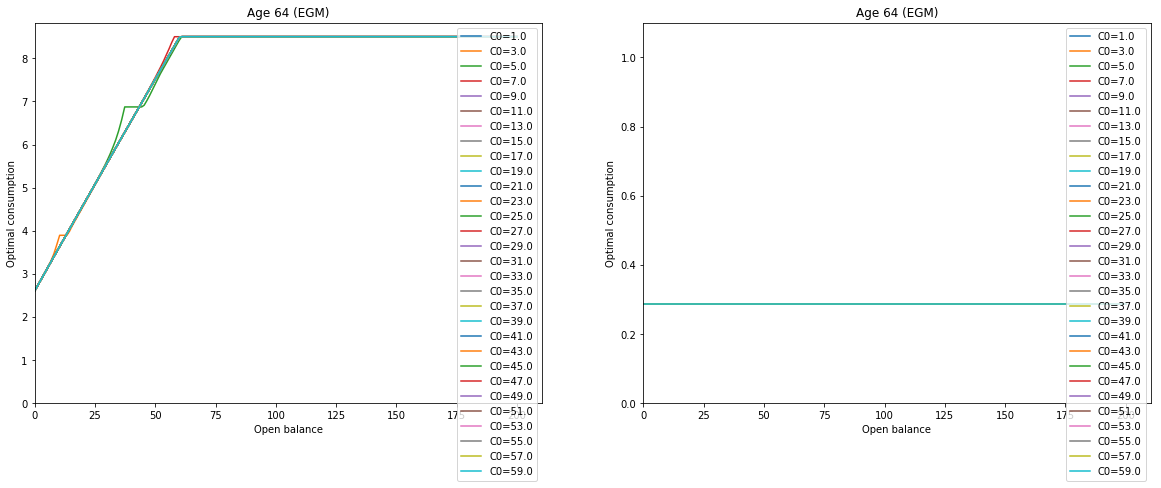

In [32]:
# SELECT YOUR AGE HERE TO PLOT OPTIMAL CONSUMPTION AND LEISURE (55-64)
AGE = 64

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
for i in range(Refc_grids):
    REF = Lower_grid_ref+(Upper_grid_ref-Lower_grid_ref)/(Refc_grids-1)*i
    plt.plot(Optimal_results_EGM_55_63['M%1d'%(AGE)][i], Optimal_results_EGM_55_63['C%1d'%(AGE)][i], label='C0=%1.1f'%(REF))
    plt.legend(loc='upper right')
    plt.xlabel('Open balance')
    plt.ylabel('Optimal consumption')
    plt.title('Age %1d (EGM)'%(AGE))
    plt.xlim(0, )
    plt.ylim(0, )
    
plt.subplot(1,2,2)
for i in range(Refc_grids):
    REF = Lower_grid_ref+(Upper_grid_ref-Lower_grid_ref)/(Refc_grids-1)*i
    plt.plot(Optimal_results_EGM_55_63['M%1d'%(AGE)][i], Optimal_results_EGM_55_63['L%1d'%(AGE)][i], label='C0=%1.1f'%(REF))
    plt.legend(loc='upper right')
    plt.xlabel('Open balance')
    plt.ylabel('Optimal consumption')
    plt.title('Age %1d (EGM)'%(AGE))
    plt.xlim(0, )
    plt.ylim(0, 1.1)

## convert to a large table!

In [33]:
Optimal_results_EGM_table = Table().with_column('A74', aa.ravel(),
                                                'R74', bb.ravel(),
                                                'C74', Optimal_results_EGM['C74'].ravel(),
                                                'L74', Optimal_results_EGM['L74'].ravel(),
                                                'M74', Optimal_results_EGM['M74'].ravel(),
                                               )
for i in range(9):#0-9, age 74-65
    age = 73-i
    Optimal_results_EGM_table = Optimal_results_EGM_table.with_column(
                                'A%1d'%(age),Optimal_results_EGM['A%1d'%(age)].ravel(),
                                'R%1d'%(age),Optimal_results_EGM['R%1d'%(age)].ravel(),
                                'C%1d'%(age),Optimal_results_EGM['C%1d'%(age)].ravel(),
                                'L%1d'%(age),Optimal_results_EGM['L%1d'%(age)].ravel(),
                                'M%1d'%(age),Optimal_results_EGM['M%1d'%(age)].ravel(),
                                )
    
Optimal_results_EGM_table.show(2)

A74,R74,C74,L74,M74,A73,R73,C73,L73,M73,A72,R72,C72,L72,M72,A71,R71,C71,L71,M71,A70,R70,C70,L70,M70,A69,R69,C69,L69,M69,A68,R68,C68,L68,M68,A67,R67,C67,L67,M67,A66,R66,C66,L66,M66,A65,R65,C65,L65,M65
1,1,1.14935,0.285714,0.00649208,1,1,1.69676,0.285714,0.553905,1,1,1.86311,0.285714,0.720252,1,1,1.94099,0.285714,0.798135,1,1,1.98425,0.285714,0.841398,1,1,2.01033,0.285714,0.867476,1,1,2.02661,0.285714,0.88375,1,1,2.03675,0.285714,0.893893,1,1,2.04279,0.285714,0.899938,1,1,2.04596,0.285714,0.903103
2,1,2.29741,0.285714,2.15456,2,1,2.25001,0.285714,2.10715,2,1,2.2326,0.285714,2.08974,2,1,2.22112,0.285714,2.07826,2,1,2.21154,0.285714,2.06868,2,1,2.20271,0.285714,2.05986,2,1,2.19422,0.285714,2.05136,2,1,2.18588,0.285714,2.04302,2,1,2.1776,0.285714,2.03475,2,1,2.16935,0.285714,2.02649


In [34]:
Optimal_results_EGM_55_63_table = Table().with_column('A64', aa.ravel(),
                                                'R64', bb.ravel(),
                                                'C64', Optimal_results_EGM_55_63['C64'].ravel(),
                                                'C_un64', Optimal_results_EGM_55_63['C_un64'].ravel(),
                                                'L64', Optimal_results_EGM_55_63['L64'].ravel(),
                                                'L_un64', Optimal_results_EGM_55_63['L_un64'].ravel(),
                                                'M64', Optimal_results_EGM_55_63['M64'].ravel(),
                                               )
for i in range(9):#0-9, age 64-55
    age = 63-i
    Optimal_results_EGM_55_63_table = Optimal_results_EGM_55_63_table.with_column(
                                'A%1d'%(age),Optimal_results_EGM_55_63['A%1d'%(age)].ravel(),
                                'R%1d'%(age),Optimal_results_EGM_55_63['R%1d'%(age)].ravel(),
                                'C%1d'%(age),Optimal_results_EGM_55_63['C%1d'%(age)].ravel(),
                                'C_un%1d'%(age),Optimal_results_EGM_55_63['C_un%1d'%(age)].ravel(),
                                'L%1d'%(age),Optimal_results_EGM_55_63['L%1d'%(age)].ravel(),
                                'L_un%1d'%(age),Optimal_results_EGM_55_63['L_un%1d'%(age)].ravel(),
                                'M%1d'%(age),Optimal_results_EGM_55_63['M%1d'%(age)].ravel(),
                                )
    
Optimal_results_EGM_55_63_table.show(2)


A64,R64,C64,C_un64,L64,L_un64,M64,A63,R63,C63,C_un63,L63,L_un63,M63,A62,R62,C62,C_un62,L62,L_un62,M62,A61,R61,C61,C_un61,L61,L_un61,M61,A60,R60,C60,C_un60,L60,L_un60,M60,A59,R59,C59,C_un59,L59,L_un59,M59,A58,R58,C58,C_un58,L58,L_un58,M58,A57,R57,C57,C_un57,L57,L_un57,M57,A56,R56,C56,C_un56,L56,L_un56,M56,A55,R55,C55,C_un55,L55,L_un55,M55
1,1,2.04703,2.04703,0.285714,0.0237302,-5.45297,1,1,2.6861,2.6861,0.285714,0.0304692,-4.8139,1,1,3.21231,3.21231,0.285714,0.0359204,-4.28769,1,1,3.65423,3.65423,0.285714,0.0404428,-3.84577,1,1,4.03021,4.03021,0.285714,0.0442558,-3.46979,1,1,4.3533,4.3533,0.285714,0.0475096,-3.1467,1,1,4.63317,4.63317,0.285714,0.0503125,-2.86683,1,1,4.87721,4.87721,0.285714,0.0527456,-2.62279,1,1,5.09123,5.09123,0.285714,0.0548712,-2.40877,1,1,5.27982,5.27982,0.285714,0.0567385,-2.22018
2,1,2.1611,2.1611,0.285714,0.0249442,-4.3389,2,1,2.79037,2.79037,0.285714,0.0315557,-3.70963,2,1,3.30936,3.30936,0.285714,0.0369175,-3.19064,2,1,3.74542,3.74542,0.285714,0.0413704,-2.75458,2,1,4.1165,4.1165,0.285714,0.0451268,-2.3835,2,1,4.43539,4.43539,0.285714,0.0483332,-2.06461,2,1,4.71159,4.71159,0.285714,0.0510955,-1.78841,2,1,4.95242,4.95242,0.285714,0.0534934,-1.54758,2,1,5.16359,5.16359,0.285714,0.0555884,-1.33641,2,1,5.34964,5.34964,0.285714,0.0574284,-1.15036


In [35]:
Optimal_results_EGM_table.to_csv('Model6_EGM_74-65.csv')
Optimal_results_EGM_55_63_table.to_csv('Model6_EGM_64-55.csv')